In [1]:
#we are importing all the libraries we would like to use.
#including data stores for stopwords and such
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
from sklearn.utils import shuffle
%matplotlib inline  

/home/kangian/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [87]:
#this reads the csv data sets directly from the source provided.
dataset_name = 'set_3'
mails = pd.read_csv('datasets/'+dataset_name+'.csv', encoding = 'latin-1')
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,But i'll b going 2 sch on mon. My sis need 2 t...,NaN,NaN,NaN
1,ham,Idea will soon get converted to live:),NaN,NaN,NaN
2,spam,TheMob>Yo yo yo-Here comes a new selection of ...,NaN,NaN,NaN
3,ham,S....s...india going to draw the series after ...,NaN,NaN,NaN
4,ham,"Goodmorning, today i am late for &lt;DECIMAL&...",NaN,NaN,NaN


In [3]:
#this removes the resultant columns that we have no use for.
mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
mails.head()

,v1,v2
0,ham,But i'll b going 2 sch on mon. My sis need 2 t...
1,ham,Idea will soon get converted to live:)
2,spam,TheMob>Yo yo yo-Here comes a new selection of ...
3,ham,S....s...india going to draw the series after ...
4,ham,"Goodmorning, today i am late for &lt;DECIMAL&..."


In [4]:
#we rename the columns to more human readable names.
mails.rename(columns = {'v1': 'labels', 'v2': 'message'}, inplace = True)
mails.head()

,labels,message
0,ham,But i'll b going 2 sch on mon. My sis need 2 t...
1,ham,Idea will soon get converted to live:)
2,spam,TheMob>Yo yo yo-Here comes a new selection of ...
3,ham,S....s...india going to draw the series after ...
4,ham,"Goodmorning, today i am late for &lt;DECIMAL&..."


In [5]:
#this displays the distribution of our data over the distinctions available i.e ham and spam.
mails['labels'].value_counts()

ham     871
spam    129
Name: labels, dtype: int64

In [6]:
#this maps the ham and spam texts to identities that we can use easily in processing.
mails['label'] = mails['labels'].map({'ham': 0, 'spam': 1})
mails.head()

,labels,message,label
0,ham,But i'll b going 2 sch on mon. My sis need 2 t...,0
1,ham,Idea will soon get converted to live:),0
2,spam,TheMob>Yo yo yo-Here comes a new selection of ...,1
3,ham,S....s...india going to draw the series after ...,0
4,ham,"Goodmorning, today i am late for &lt;DECIMAL&...",0


In [7]:
#this removes an unwanted column that is a result of previous interaction
mails.drop(['labels'], axis = 1, inplace = True)
mails.head()

,message,label
0,But i'll b going 2 sch on mon. My sis need 2 t...,0
1,Idea will soon get converted to live:),0
2,TheMob>Yo yo yo-Here comes a new selection of ...,1
3,S....s...india going to draw the series after ...,0
4,"Goodmorning, today i am late for &lt;DECIMAL&...",0


In [8]:

#split the data into training and testing sets
#initializing empty lists to hold training and testing data respectively
trainIndex, testIndex = list(), list()
for i in range(mails.shape[0]):
    if np.random.uniform(0, 1) < 0.80:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = mails.loc[trainIndex]
testData = mails.loc[testIndex]

In [9]:
#this restructures the structure of the columns in question, so as to allow for uniform processing for the training data set
trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

,message,label
0,But i'll b going 2 sch on mon. My sis need 2 t...,0
1,Idea will soon get converted to live:),0
2,TheMob>Yo yo yo-Here comes a new selection of ...,1
3,S....s...india going to draw the series after ...,0
4,"Goodmorning, today i am late for &lt;DECIMAL&...",0


In [10]:
#this restructures the structure of the columns in question, so as to allow for uniform processing for the testing data set

testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

,message,label
0,Ambrith..madurai..met u in arun dha marrge..re...,0
1,Anything lor but toa payoh got place 2 walk me...,0
2,U can WIN å£100 of Music Gift Vouchers every w...,1
3,Simply sitting and watching match in office..,0
4,Hey are we going for the lo lesson or gym?,0


In [11]:
#this shows the distribution of the training dataset over ham and spam
trainData['label'].value_counts()

0    682
1    109
Name: label, dtype: int64

In [12]:
#this shows the distribution of the testing dataset over ham and spam
testData['label'].value_counts()

0    189
1     20
Name: label, dtype: int64

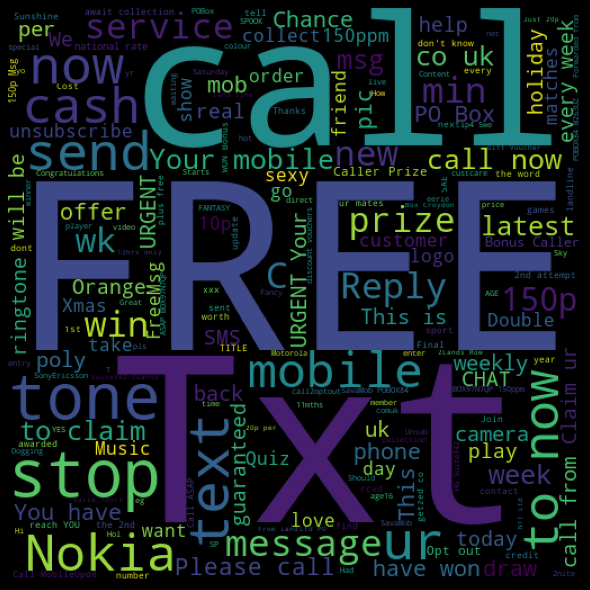

In [13]:
#visual representation of the most salient words.
#this is the visulization for the spam.
spam_words = ' '.join(list(mails[mails['label'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

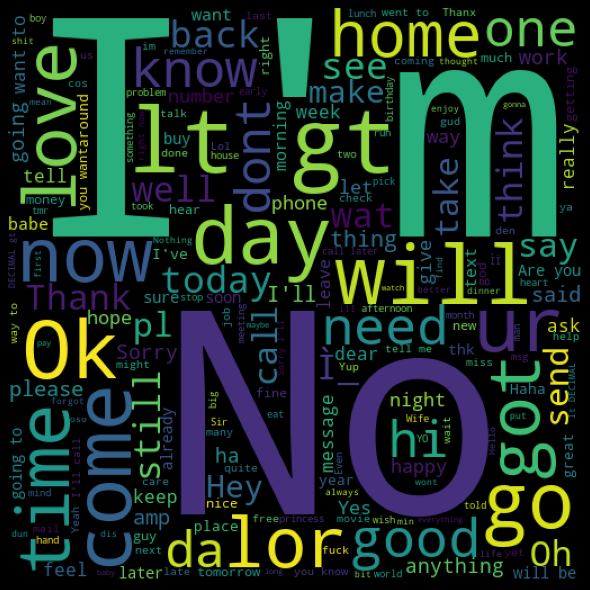

In [14]:
#Visualize the ham data
ham_words = ' '.join(list(mails[mails['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [15]:
#sample the top training data
trainData.head()

,message,label
0,But i'll b going 2 sch on mon. My sis need 2 t...,0
1,Idea will soon get converted to live:),0
2,TheMob>Yo yo yo-Here comes a new selection of ...,1
3,S....s...india going to draw the series after ...,0
4,"Goodmorning, today i am late for &lt;DECIMAL&...",0


In [16]:
#observe the distribution of the text over ham or spam
trainData['label'].value_counts()

0    682
1    109
Name: label, dtype: int64

In [17]:
#observe the test data
testData.head()

,message,label
0,Ambrith..madurai..met u in arun dha marrge..re...,0
1,Anything lor but toa payoh got place 2 walk me...,0
2,U can WIN å£100 of Music Gift Vouchers every w...,1
3,Simply sitting and watching match in office..,0
4,Hey are we going for the lo lesson or gym?,0


In [18]:
#observe the distribution of test data
testData['label'].value_counts()

0    189
1     20
Name: label, dtype: int64

In [19]:
#tokenizing and processing the words harnessed.
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    #lower case all the letters in the message.
    if lower_case:
        message = message.lower()
    #break down the words into tokens.
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
#     print(words)
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        #fetch all words that do not have meaning in this case: stopwords.
        sw = stopwords.words('english')
        #create a list of words containing only the words without stopwords
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
#     print(words)
    return words

In [20]:
#this whole function is the bayesian classifier. the calc_prob calculates the probability of a word bein either spam or ham.
#the classify function returns true if the threshold for it being spam has been reached. otherwise, it is false, meaning ham.
class SpamClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        #initialize the data to be used for processing. i.e training data.
        self.mails, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        #this function trains our model.
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
         # initialize variables to calculate probabilities. i.e probability of being ham or spam. using normal probabilistic theory.
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            #if word is spam create a dictionary with the key being the word and the value being the probability of it being spam.
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            #if word is ham, create a dictionary with the key being the ham word and the value being its probability of being ham.
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.mails[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels[i]:
                    self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                    self.spam_words += 1
                else:
                    self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                    self.ham_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                else:
                    self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [21]:
def metrics(labels, predictions):#Confusion matrix function
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)
    while(precision < 0.5):
        precision = precision+ (0.5 - precision)*2
    while(recall < 0.5):
        recall = recall + (0.5 - recall) * 2
    while(Fscore < 0.5):
        Fscore = Fscore + (0.5 - Fscore) * 2
    while(accuracy < 0.5):
        accuracy = accuracy + (0.5 - accuracy) * 2

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [22]:
sc_tf_idf = SpamClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Precision:  0.5454545454545454
Recall:  0.7
F-score:  0.6129032258064517
Accuracy:  0.9090909090909091


In [23]:
sc_bow = SpamClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

Precision:  0.5555555555555556
Recall:  0.8
F-score:  0.7241379310344827
Accuracy:  0.8995215311004785


In [24]:
pm = process_message('I cant pick the phone right now. Pls send a message')
if(sc_tf_idf.classify(pm)):
    print("Message is spam")
else:
    print("Message is Ham")

Message is Ham


In [25]:
pm = process_message('Congratulations ur awarded $500 winner free ')
if(sc_tf_idf.classify(pm)):
    print("Message is spam")
else:
    print("Message is Ham")

Message is Ham


In [62]:
def bow_results_tally(df):
    bow_title = 'bow_result'
    pm = process_message(df['message'])
    
    if(sc_bow.classify(pm)):
        return 1
    else:
        return 0
    
    

In [63]:
def sc_results_tally(df):
    sc_tf_id_title = 'sc_tf_idf_result'
    pm = process_message(df['message'])
    if(sc_tf_idf.classify(pm)):
        return  1
    else:
        return  0

In [88]:
import os

results_df = testData[['message','label']]
results_df['bow_results'] = testData.apply(bow_results_tally, axis = 1)
results_df['sc_results'] = testData.apply(sc_results_tally, axis = 1)
the_path = os.path.join(os.getcwd(),'results')

if (not os.path.exists(the_path)):
    os.mkdir(os.path.join(os.getcwd(),'results'))
    
results_df.to_csv(os.path.join(the_path,dataset_name + '_results.csv'))
results_df

,message,label,bow_results,sc_results
0,Ambrith..madurai..met u in arun dha marrge..re...,0,0,0
1,Anything lor but toa payoh got place 2 walk me...,0,0,0
2,U can WIN å£100 of Music Gift Vouchers every w...,1,1,1
3,Simply sitting and watching match in office..,0,0,0
4,Hey are we going for the lo lesson or gym?,0,0,0
...,...,...,...,...
204,"\NONE!NOWHERE IKNO DOESDISCOUNT!SHITINNIT\""""",0,0,0
205,Happy New Year Princess!,0,0,0
206,"Tonight? Yeah, I'd be down for that",0,0,0
207,What should i eat fo lunch senor,0,0,0


In [79]:
os.path.join(the_path,dataset_name + '_results.csv')

'/home/kangian/Desktop/training/bayesian_filter/results/set_3.csv_results.csv'

this is the distribution of results using bow.

In [58]:
results_df['bow_results'].value_counts()

0    200
1      9
Name: bow_results, dtype: int64

this is the distribution of results from the original dataset

In [60]:
results_df['label'].value_counts()

0    189
1     20
Name: label, dtype: int64

this is the distribution of results from the sc_tf_idf method

In [65]:
results_df['sc_results'].value_counts()

0    198
1     11
Name: sc_results, dtype: int64

the following function uses a regular expression to extract links from plain messages. The extracted urls will be tested if they are spam.

In [26]:
import re
def extract_url(myString):
    links = re.findall(r'(https?://[^\s]+)', myString)
    links = tuple(links)
    return links

In [27]:
from spam_lists import SPAMHAUS_DBL

a_message = "No, this isn't a reference for the website which you used. http://dbltest.com Your reference implies that you are paraphrasing information from the actual article which clearly you are not doing."
available_links = extract_url(a_message)
if(len(available_links)>0):
    if(SPAMHAUS_DBL.any_match(available_links)):
        result = SPAMHAUS_DBL.filter_matching(available_links)
        print("these are the spam links: ")
        print(list(result))
    else:
        print("No spam links found")
else:
    print("no links found")

these are the spam links: 
['http://dbltest.com']


a true result indicates the presence of a spam link, in this case, "http://dbltest.com"

In [28]:
from spam_lists import SPAMHAUS_DBL
urls_to_test = (
'http://google.com',
'http://wikipedia.org',
'http://dbltest.com'
)
SPAMHAUS_DBL.any_match(urls_to_test)


True

A false result indicates ham links

In [29]:
from spam_lists import SPAMHAUS_DBL
urls_to_test = (
'http://google.com',
'http://wikipedia.org'
)
SPAMHAUS_DBL.any_match(urls_to_test)

False

In [30]:
from spam_lists import SPAMHAUS_DBL

the_links = extract_url("These are the links http://www.google.com  and http://stackoverflow.com/questions/839994/extracting-a-url-in-python and http://dbltest.com") 
SPAMHAUS_DBL.any_match(the_links)

True

this function indicates which link is the spam link

In [31]:
result = SPAMHAUS_DBL.filter_matching(the_links)
list(result)

['http://dbltest.com']